In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
import warnings
warnings.filterwarnings('ignore')

In [107]:
df = pd.read_csv('Walmart Data Analysis and Forcasting.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [108]:
df.shape

(6435, 8)

In [109]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [110]:
data = df[['Date','Weekly_Sales']]

In [111]:
data.head()

,Date,Weekly_Sales
0,05-02-2010,1643690.90
1,12-02-2010,1641957.44
2,19-02-2010,1611968.17
3,26-02-2010,1409727.59
4,05-03-2010,1554806.68


In [112]:
data.dtypes

Date             object
Weekly_Sales    float64
dtype: object

In [115]:
data['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'])

In [116]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5


### EDA

In [117]:
pt1 = pd.pivot_table(data=df,columns=['Year'],index=['Month'],values=['Weekly_Sales'])
pt1

Weekly_Sales                            
Year           2010          2011          2012
Month                                          
1      9.386639e+05  9.420697e+05  9.567817e+05
2      1.064372e+06  1.042273e+06  1.057997e+06
3      1.034590e+06  1.011263e+06  1.025510e+06
4      1.021177e+06  1.033220e+06  1.014127e+06
5      1.039303e+06  1.015565e+06  1.053948e+06
6      1.055082e+06  1.038471e+06  1.082920e+06
7      1.023702e+06  9.976049e+05  1.025480e+06
8      1.025212e+06  1.044895e+06  1.064514e+06
9      9.983559e+05  1.026810e+06  9.988663e+05
10     1.027201e+06  1.020663e+06  1.044885e+06
11     1.176097e+06  1.126535e+06  1.042797e+06
12     1.198413e+06  1.274311e+06  1.025078e+06

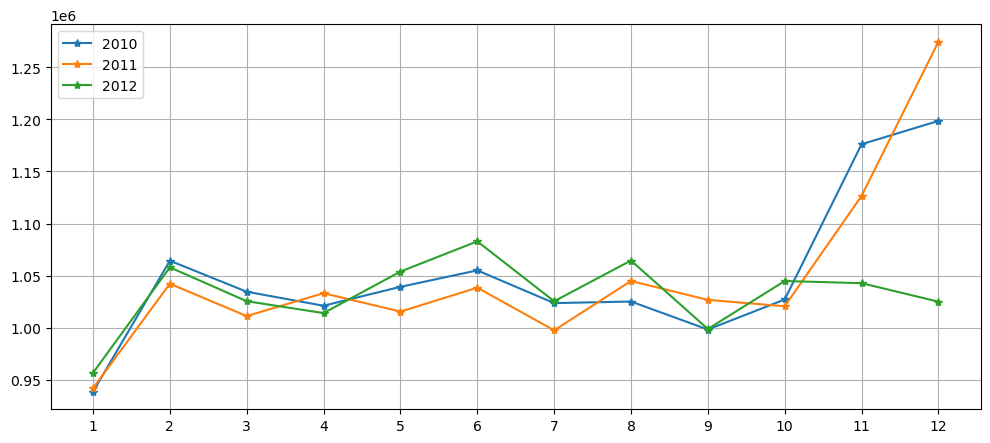

In [118]:
cols =[2010,2011,2012]

plt.figure(figsize=(12,5))
plt.plot(pt1,label=cols,marker='*')
plt.xlabel=('Month')
plt.ylabel=('Passengers')
plt.grid()
plt.legend()
plt.xticks(list(range(1,13)))
plt.show()

#### Time Series Data Preprocessing

In [119]:
data.head()

,Date,Weekly_Sales
0,2010-05-02,1643690.90
1,2010-12-02,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-05-03,1554806.68


In [120]:
data.shape

(6435, 2)

In [121]:
data = df.groupby(['Date'])['Weekly_Sales'].mean().reset_index()
data.head()

,Date,Weekly_Sales
0,2010-01-10,9.386639e+05
1,2010-02-04,1.120530e+06
2,2010-02-07,1.087055e+06
3,2010-02-19,1.072822e+06
4,2010-02-26,9.770794e+05


In [122]:
data.sort_values('Date',inplace=True)
data.head()

,Date,Weekly_Sales
0,2010-01-10,9.386639e+05
1,2010-02-04,1.120530e+06
2,2010-02-07,1.087055e+06
3,2010-02-19,1.072822e+06
4,2010-02-26,9.770794e+05


In [123]:
data.tail()

,Date,Weekly_Sales
138,2012-10-08,1.053410e+06
139,2012-10-19,1.002720e+06
140,2012-10-26,1.012091e+06
141,2012-11-05,1.042797e+06
142,2012-12-10,1.025078e+06


In [124]:
data.shape

(143, 2)

In [125]:
data.set_index('Date',inplace=True)
data.head()

,Weekly_Sales
Date,
2010-01-10,9.386639e+05
2010-02-04,1.120530e+06
2010-02-07,1.087055e+06
2010-02-19,1.072822e+06
2010-02-26,9.770794e+05


In [126]:
data.shape

(143, 1)

###  Resampleing

In [127]:
df1 = data.resample('MS').mean()
df1.head(10)

,Weekly_Sales
Date,
2010-01-01,9.386639e+05
2010-02-01,1.064372e+06
2010-03-01,1.034590e+06
2010-04-01,1.021177e+06
2010-05-01,1.039303e+06
2010-06-01,1.055082e+06
2010-07-01,1.023702e+06
2010-08-01,1.025212e+06
2010-09-01,9.983559e+05


In [128]:
df1.index.duplicated().sum()

0

In [129]:
df1.shape

(36, 1)

In [130]:
df1.reset_index().dtypes

Date            datetime64[ns]
Weekly_Sales           float64
dtype: object

In [131]:
date_check = pd.date_range(start=min(df1.index),end=max(df1.index),freq='MS')
date_check

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [132]:
len(date_check)

36

In [133]:
df1.shape

(36, 1)

In [135]:
set(date_check).difference(df1.index)

set()

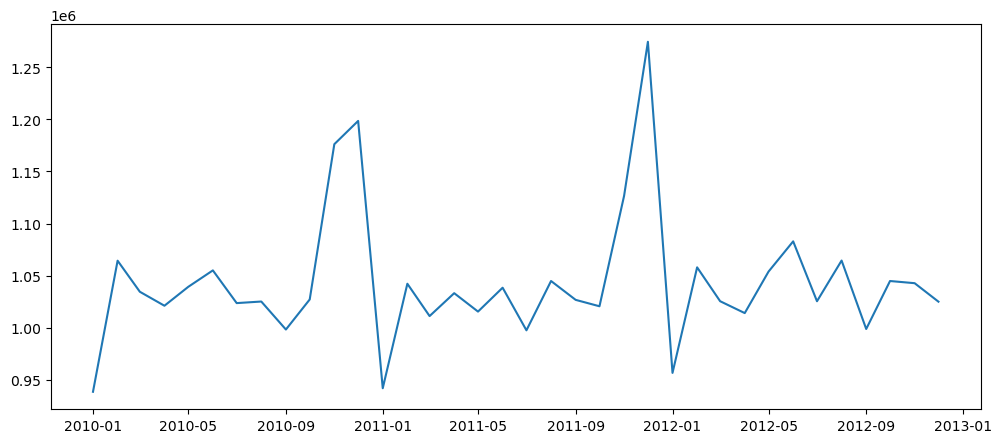

In [136]:
plt.figure(figsize=(12,5))
plt.plot(df1)
plt.show()

### Decompose data

In [137]:
from statsmodels.tsa.seasonal import seasonal_decompose

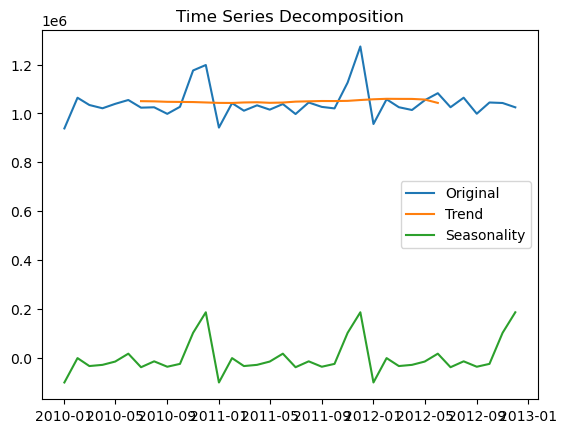

In [138]:
decom = seasonal_decompose(df1)

original = decom.observed
trend = decom.trend
seasonality = decom.seasonal

plt.plot(original,label = 'Original')
plt.plot(trend,label='Trend')
plt.plot(seasonality,label='Seasonality')
plt.title('Time Series Decomposition')
plt.legend()
plt.show()

In [139]:
df1.shape

(36, 1)

In [140]:
df1.isnull().sum()

Weekly_Sales    0
dtype: int64

In [141]:
from sklearn.metrics import *

In [142]:
train = df1.iloc[:24]
test = df1.iloc[24:]
print(train.shape)
print(test.shape)

(24, 1)
(12, 1)


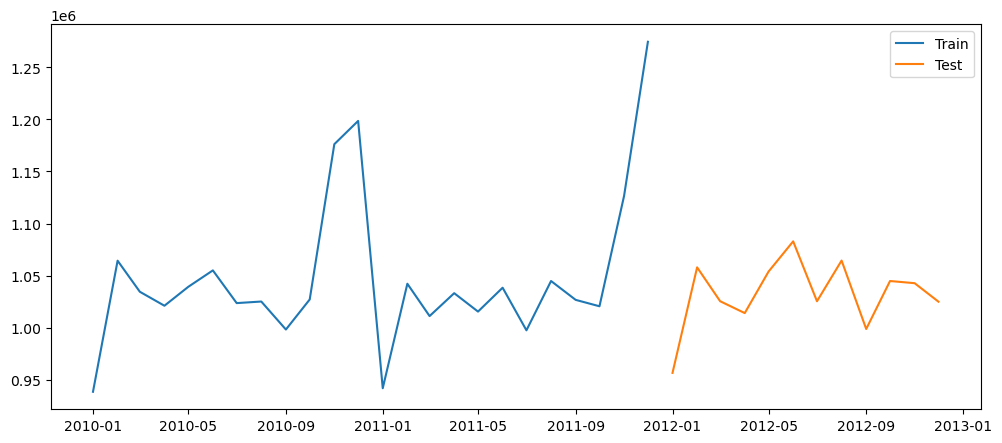

In [144]:
plt.figure(figsize=(12,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.legend()
plt.show()

In [145]:
print(train.head(1))
print(test.tail(1))

             Weekly_Sales
Date                     
2010-01-01  938663.908222
            Weekly_Sales
Date                    
2012-12-01  1.025078e+06


In [167]:
def eval_model(test,pred,model_name):
    mae = mean_absolute_error(test,pred)
    mse = mean_squared_error(test,pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test,pred)
    res = pd.DataFrame({'MAE':mae,'MSE':mse,'RMSE':rmse,'MAPE':mape},index=[model_name])
    
    return res

def plot_res(train,test,fcast):
    plt.figure(figsize=(12,5))
    plt.plot(train,label='Train')
    plt.plot(test,label='Test')
    plt.plot(fcast,label='Forecast') 
    plt.legend()
    plt.show()

### expo smothing

#### TES

In [168]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [169]:
alpha = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75]
beta = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75]
gamma = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75]
print((len(alpha))*(len(beta))*(len(gamma)))

2744


In [170]:
min_mse = 9999999999
min_rmse = 99999999999
av = bv = gv =0
c = 0
for i in alpha:
    for j in beta:
        for k in gamma:
            es = ExponentialSmoothing(train,trend='add',seasonal='add')
            es_model = es.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k)
            fcast = es_model.forecast(len(test))
            mse = mean_squared_error(test,fcast)
            rmse = np.sqrt(mse)
            c+=1
            print(f'For Iteration {c},alpha={i},beta={j},gamma={k},RMSE={rmse}')
            if mse <= min_mse:
                min_mse = mse
            elif rmse <=min_rmse:
                min_rmse = rmse
                av = i
                bv = j
                gv = k

For Iteration 1,alpha=0.1,beta=0.1,gamma=0.1,RMSE=69593.45902588185
For Iteration 2,alpha=0.1,beta=0.1,gamma=0.15,RMSE=69138.66078477676
For Iteration 3,alpha=0.1,beta=0.1,gamma=0.2,RMSE=68479.70997134339
For Iteration 4,alpha=0.1,beta=0.1,gamma=0.25,RMSE=67858.73980494642
For Iteration 5,alpha=0.1,beta=0.1,gamma=0.3,RMSE=67241.13421370396
For Iteration 6,alpha=0.1,beta=0.1,gamma=0.35,RMSE=66591.35483475227
For Iteration 7,alpha=0.1,beta=0.1,gamma=0.4,RMSE=65957.7059120142
For Iteration 8,alpha=0.1,beta=0.1,gamma=0.45,RMSE=65326.30392868242
For Iteration 9,alpha=0.1,beta=0.1,gamma=0.5,RMSE=64625.61566288833
For Iteration 10,alpha=0.1,beta=0.1,gamma=0.55,RMSE=63988.12088640553
For Iteration 11,alpha=0.1,beta=0.1,gamma=0.6,RMSE=63386.85410146224
For Iteration 12,alpha=0.1,beta=0.1,gamma=0.65,RMSE=62817.453589555946
For Iteration 13,alpha=0.1,beta=0.1,gamma=0.7,RMSE=62271.798828055915
For Iteration 14,alpha=0.1,beta=0.1,gamma=0.75,RMSE=61814.71821182079
For Iteration 15,alpha=0.1,beta=0.1

For Iteration 121,alpha=0.1,beta=0.5,gamma=0.5,RMSE=78072.75887151214
For Iteration 122,alpha=0.1,beta=0.5,gamma=0.55,RMSE=77535.67351086726
For Iteration 123,alpha=0.1,beta=0.5,gamma=0.6,RMSE=77073.4674382656
For Iteration 124,alpha=0.1,beta=0.5,gamma=0.65,RMSE=76522.51305000631
For Iteration 125,alpha=0.1,beta=0.5,gamma=0.7,RMSE=76048.04125926287
For Iteration 126,alpha=0.1,beta=0.5,gamma=0.75,RMSE=75525.88216609234
For Iteration 127,alpha=0.1,beta=0.55,gamma=0.1,RMSE=82338.92840499544
For Iteration 128,alpha=0.1,beta=0.55,gamma=0.15,RMSE=82216.33856467497
For Iteration 129,alpha=0.1,beta=0.55,gamma=0.2,RMSE=81902.41391564395
For Iteration 130,alpha=0.1,beta=0.55,gamma=0.25,RMSE=81554.37137665466
For Iteration 131,alpha=0.1,beta=0.55,gamma=0.3,RMSE=81174.53561895172
For Iteration 132,alpha=0.1,beta=0.55,gamma=0.35,RMSE=80796.61687768965
For Iteration 133,alpha=0.1,beta=0.55,gamma=0.4,RMSE=80417.01562503519
For Iteration 134,alpha=0.1,beta=0.55,gamma=0.45,RMSE=79982.36481892459
For It

For Iteration 237,alpha=0.15,beta=0.2,gamma=0.7,RMSE=69226.30957949499
For Iteration 238,alpha=0.15,beta=0.2,gamma=0.75,RMSE=68793.72523668598
For Iteration 239,alpha=0.15,beta=0.25,gamma=0.1,RMSE=76979.30474217006
For Iteration 240,alpha=0.15,beta=0.25,gamma=0.15,RMSE=76691.57180506682
For Iteration 241,alpha=0.15,beta=0.25,gamma=0.2,RMSE=76387.0295626594
For Iteration 242,alpha=0.15,beta=0.25,gamma=0.25,RMSE=76015.77307595803
For Iteration 243,alpha=0.15,beta=0.25,gamma=0.3,RMSE=75637.73928370021
For Iteration 244,alpha=0.15,beta=0.25,gamma=0.35,RMSE=75272.73367578053
For Iteration 245,alpha=0.15,beta=0.25,gamma=0.4,RMSE=74848.21737484475
For Iteration 246,alpha=0.15,beta=0.25,gamma=0.45,RMSE=74361.68260034075
For Iteration 247,alpha=0.15,beta=0.25,gamma=0.5,RMSE=73908.49769944522
For Iteration 248,alpha=0.15,beta=0.25,gamma=0.55,RMSE=73415.45630905665
For Iteration 249,alpha=0.15,beta=0.25,gamma=0.6,RMSE=72918.67432442239
For Iteration 250,alpha=0.15,beta=0.25,gamma=0.65,RMSE=72438.

For Iteration 352,alpha=0.15,beta=0.65,gamma=0.15,RMSE=91857.20149036877
For Iteration 353,alpha=0.15,beta=0.65,gamma=0.2,RMSE=91766.54571955555
For Iteration 354,alpha=0.15,beta=0.65,gamma=0.25,RMSE=91833.02364822399
For Iteration 355,alpha=0.15,beta=0.65,gamma=0.3,RMSE=91966.72836265412
For Iteration 356,alpha=0.15,beta=0.65,gamma=0.35,RMSE=91692.52471129876
For Iteration 357,alpha=0.15,beta=0.65,gamma=0.4,RMSE=91672.87567985209
For Iteration 358,alpha=0.15,beta=0.65,gamma=0.45,RMSE=91189.18753776157
For Iteration 359,alpha=0.15,beta=0.65,gamma=0.5,RMSE=91259.27336912765
For Iteration 360,alpha=0.15,beta=0.65,gamma=0.55,RMSE=90804.02577895187
For Iteration 361,alpha=0.15,beta=0.65,gamma=0.6,RMSE=90779.91746101607
For Iteration 362,alpha=0.15,beta=0.65,gamma=0.65,RMSE=90639.45145448275
For Iteration 363,alpha=0.15,beta=0.65,gamma=0.7,RMSE=90094.62361232523
For Iteration 364,alpha=0.15,beta=0.65,gamma=0.75,RMSE=89706.88654304967
For Iteration 365,alpha=0.15,beta=0.7,gamma=0.1,RMSE=9327

For Iteration 470,alpha=0.2,beta=0.35,gamma=0.45,RMSE=84235.69458223505
For Iteration 471,alpha=0.2,beta=0.35,gamma=0.5,RMSE=83960.02584348597
For Iteration 472,alpha=0.2,beta=0.35,gamma=0.55,RMSE=83743.77572479498
For Iteration 473,alpha=0.2,beta=0.35,gamma=0.6,RMSE=83326.93210442446
For Iteration 474,alpha=0.2,beta=0.35,gamma=0.65,RMSE=82930.80018973915
For Iteration 475,alpha=0.2,beta=0.35,gamma=0.7,RMSE=82560.7723332481
For Iteration 476,alpha=0.2,beta=0.35,gamma=0.75,RMSE=82491.88214875037
For Iteration 477,alpha=0.2,beta=0.4,gamma=0.1,RMSE=87858.92492307362
For Iteration 478,alpha=0.2,beta=0.4,gamma=0.15,RMSE=87987.50134609136
For Iteration 479,alpha=0.2,beta=0.4,gamma=0.2,RMSE=87807.17279615226
For Iteration 480,alpha=0.2,beta=0.4,gamma=0.25,RMSE=87701.00370725495
For Iteration 481,alpha=0.2,beta=0.4,gamma=0.3,RMSE=87606.63956426106
For Iteration 482,alpha=0.2,beta=0.4,gamma=0.35,RMSE=87557.76630576265
For Iteration 483,alpha=0.2,beta=0.4,gamma=0.4,RMSE=87319.8154510434
For Iter

For Iteration 587,alpha=0.2,beta=0.75,gamma=0.7,RMSE=102662.58736296056
For Iteration 588,alpha=0.2,beta=0.75,gamma=0.75,RMSE=102768.480846062
For Iteration 589,alpha=0.25,beta=0.1,gamma=0.1,RMSE=73815.68567047548
For Iteration 590,alpha=0.25,beta=0.1,gamma=0.15,RMSE=73474.58089438122
For Iteration 591,alpha=0.25,beta=0.1,gamma=0.2,RMSE=73138.25556502293
For Iteration 592,alpha=0.25,beta=0.1,gamma=0.25,RMSE=72831.22080653334
For Iteration 593,alpha=0.25,beta=0.1,gamma=0.3,RMSE=72469.87796789638
For Iteration 594,alpha=0.25,beta=0.1,gamma=0.35,RMSE=72128.31309755034
For Iteration 595,alpha=0.25,beta=0.1,gamma=0.4,RMSE=71649.28858443878
For Iteration 596,alpha=0.25,beta=0.1,gamma=0.45,RMSE=71249.40263056157
For Iteration 597,alpha=0.25,beta=0.1,gamma=0.5,RMSE=70792.8742200102
For Iteration 598,alpha=0.25,beta=0.1,gamma=0.55,RMSE=70342.23948833949
For Iteration 599,alpha=0.25,beta=0.1,gamma=0.6,RMSE=69912.18774558166
For Iteration 600,alpha=0.25,beta=0.1,gamma=0.65,RMSE=69564.35541748929


For Iteration 702,alpha=0.25,beta=0.5,gamma=0.15,RMSE=99031.2275749214
For Iteration 703,alpha=0.25,beta=0.5,gamma=0.2,RMSE=99404.27995967209
For Iteration 704,alpha=0.25,beta=0.5,gamma=0.25,RMSE=99103.60141514496
For Iteration 705,alpha=0.25,beta=0.5,gamma=0.3,RMSE=99759.72714256692
For Iteration 706,alpha=0.25,beta=0.5,gamma=0.35,RMSE=99651.00001650807
For Iteration 707,alpha=0.25,beta=0.5,gamma=0.4,RMSE=99700.82355442345
For Iteration 708,alpha=0.25,beta=0.5,gamma=0.45,RMSE=99600.38623692948
For Iteration 709,alpha=0.25,beta=0.5,gamma=0.5,RMSE=99812.80163907501
For Iteration 710,alpha=0.25,beta=0.5,gamma=0.55,RMSE=99434.92946517169
For Iteration 711,alpha=0.25,beta=0.5,gamma=0.6,RMSE=99406.45881898327
For Iteration 712,alpha=0.25,beta=0.5,gamma=0.65,RMSE=98935.2095468813
For Iteration 713,alpha=0.25,beta=0.5,gamma=0.7,RMSE=99338.8560207509
For Iteration 714,alpha=0.25,beta=0.5,gamma=0.75,RMSE=99265.42645810312
For Iteration 715,alpha=0.25,beta=0.55,gamma=0.1,RMSE=101392.7618408396
F

For Iteration 819,alpha=0.3,beta=0.2,gamma=0.4,RMSE=82874.1761851003
For Iteration 820,alpha=0.3,beta=0.2,gamma=0.45,RMSE=82691.59303937508
For Iteration 821,alpha=0.3,beta=0.2,gamma=0.5,RMSE=82525.90524141789
For Iteration 822,alpha=0.3,beta=0.2,gamma=0.55,RMSE=82359.62147839795
For Iteration 823,alpha=0.3,beta=0.2,gamma=0.6,RMSE=82045.79574024426
For Iteration 824,alpha=0.3,beta=0.2,gamma=0.65,RMSE=81598.73111377905
For Iteration 825,alpha=0.3,beta=0.2,gamma=0.7,RMSE=81451.21681626895
For Iteration 826,alpha=0.3,beta=0.2,gamma=0.75,RMSE=81235.18672121978
For Iteration 827,alpha=0.3,beta=0.25,gamma=0.1,RMSE=87270.77334629014
For Iteration 828,alpha=0.3,beta=0.25,gamma=0.15,RMSE=87334.90542508756
For Iteration 829,alpha=0.3,beta=0.25,gamma=0.2,RMSE=87408.06594861069
For Iteration 830,alpha=0.3,beta=0.25,gamma=0.25,RMSE=87347.32761935517
For Iteration 831,alpha=0.3,beta=0.25,gamma=0.3,RMSE=87471.18695168498
For Iteration 832,alpha=0.3,beta=0.25,gamma=0.35,RMSE=87459.4707876078
For Itera

For Iteration 936,alpha=0.3,beta=0.6,gamma=0.65,RMSE=113423.57722716291
For Iteration 937,alpha=0.3,beta=0.6,gamma=0.7,RMSE=113894.39431541816
For Iteration 938,alpha=0.3,beta=0.6,gamma=0.75,RMSE=114783.34717211546
For Iteration 939,alpha=0.3,beta=0.65,gamma=0.1,RMSE=111264.97638830388
For Iteration 940,alpha=0.3,beta=0.65,gamma=0.15,RMSE=111402.79174465734
For Iteration 941,alpha=0.3,beta=0.65,gamma=0.2,RMSE=111960.30415477039
For Iteration 942,alpha=0.3,beta=0.65,gamma=0.25,RMSE=112436.11595497186
For Iteration 943,alpha=0.3,beta=0.65,gamma=0.3,RMSE=112586.194699522
For Iteration 944,alpha=0.3,beta=0.65,gamma=0.35,RMSE=113275.03868261441
For Iteration 945,alpha=0.3,beta=0.65,gamma=0.4,RMSE=113640.29078978488
For Iteration 946,alpha=0.3,beta=0.65,gamma=0.45,RMSE=114904.14459695043
For Iteration 947,alpha=0.3,beta=0.65,gamma=0.5,RMSE=115151.04741614488
For Iteration 948,alpha=0.3,beta=0.65,gamma=0.55,RMSE=114899.64092632315
For Iteration 949,alpha=0.3,beta=0.65,gamma=0.6,RMSE=116118.16

For Iteration 1054,alpha=0.35,beta=0.35,gamma=0.25,RMSE=100866.65653786718
For Iteration 1055,alpha=0.35,beta=0.35,gamma=0.3,RMSE=101830.45577142375
For Iteration 1056,alpha=0.35,beta=0.35,gamma=0.35,RMSE=101932.27949052463
For Iteration 1057,alpha=0.35,beta=0.35,gamma=0.4,RMSE=102147.2893389454
For Iteration 1058,alpha=0.35,beta=0.35,gamma=0.45,RMSE=102592.79485165137
For Iteration 1059,alpha=0.35,beta=0.35,gamma=0.5,RMSE=102935.3852010666
For Iteration 1060,alpha=0.35,beta=0.35,gamma=0.55,RMSE=102680.63604513548
For Iteration 1061,alpha=0.35,beta=0.35,gamma=0.6,RMSE=102820.74683963161
For Iteration 1062,alpha=0.35,beta=0.35,gamma=0.65,RMSE=103181.74636222757
For Iteration 1063,alpha=0.35,beta=0.35,gamma=0.7,RMSE=103008.02273555627
For Iteration 1064,alpha=0.35,beta=0.35,gamma=0.75,RMSE=102933.84583289617
For Iteration 1065,alpha=0.35,beta=0.4,gamma=0.1,RMSE=103935.88783297894
For Iteration 1066,alpha=0.35,beta=0.4,gamma=0.15,RMSE=104312.2991133573
For Iteration 1067,alpha=0.35,beta=0

For Iteration 1167,alpha=0.35,beta=0.75,gamma=0.3,RMSE=127405.59184050506
For Iteration 1168,alpha=0.35,beta=0.75,gamma=0.35,RMSE=128543.32868204339
For Iteration 1169,alpha=0.35,beta=0.75,gamma=0.4,RMSE=129772.46869410628
For Iteration 1170,alpha=0.35,beta=0.75,gamma=0.45,RMSE=132072.7401498416
For Iteration 1171,alpha=0.35,beta=0.75,gamma=0.5,RMSE=132577.31028610826
For Iteration 1172,alpha=0.35,beta=0.75,gamma=0.55,RMSE=135557.51549277527
For Iteration 1173,alpha=0.35,beta=0.75,gamma=0.6,RMSE=137773.9120885243
For Iteration 1174,alpha=0.35,beta=0.75,gamma=0.65,RMSE=139249.7809369691
For Iteration 1175,alpha=0.35,beta=0.75,gamma=0.7,RMSE=141030.71418930654
For Iteration 1176,alpha=0.35,beta=0.75,gamma=0.75,RMSE=142709.53540046772
For Iteration 1177,alpha=0.4,beta=0.1,gamma=0.1,RMSE=79965.33305674914
For Iteration 1178,alpha=0.4,beta=0.1,gamma=0.15,RMSE=80034.53491344386
For Iteration 1179,alpha=0.4,beta=0.1,gamma=0.2,RMSE=80038.9636493977
For Iteration 1180,alpha=0.4,beta=0.1,gamma=0

For Iteration 1281,alpha=0.4,beta=0.45,gamma=0.4,RMSE=119669.12214467145
For Iteration 1282,alpha=0.4,beta=0.45,gamma=0.45,RMSE=120146.8840752207
For Iteration 1283,alpha=0.4,beta=0.45,gamma=0.5,RMSE=121595.0641587766
For Iteration 1284,alpha=0.4,beta=0.45,gamma=0.55,RMSE=122059.96759843892
For Iteration 1285,alpha=0.4,beta=0.45,gamma=0.6,RMSE=122312.07049226438
For Iteration 1286,alpha=0.4,beta=0.45,gamma=0.65,RMSE=123358.81793315071
For Iteration 1287,alpha=0.4,beta=0.45,gamma=0.7,RMSE=124072.76822313924
For Iteration 1288,alpha=0.4,beta=0.45,gamma=0.75,RMSE=123841.07992941364
For Iteration 1289,alpha=0.4,beta=0.5,gamma=0.1,RMSE=116786.39078474735
For Iteration 1290,alpha=0.4,beta=0.5,gamma=0.15,RMSE=117631.2527000678
For Iteration 1291,alpha=0.4,beta=0.5,gamma=0.2,RMSE=118833.08607184947
For Iteration 1292,alpha=0.4,beta=0.5,gamma=0.25,RMSE=120288.03225389244
For Iteration 1293,alpha=0.4,beta=0.5,gamma=0.3,RMSE=121290.86892886698
For Iteration 1294,alpha=0.4,beta=0.5,gamma=0.35,RMSE

For Iteration 1395,alpha=0.45,beta=0.15,gamma=0.5,RMSE=90395.9259451705
For Iteration 1396,alpha=0.45,beta=0.15,gamma=0.55,RMSE=90683.97233064566
For Iteration 1397,alpha=0.45,beta=0.15,gamma=0.6,RMSE=90468.68015108882
For Iteration 1398,alpha=0.45,beta=0.15,gamma=0.65,RMSE=90610.12714824155
For Iteration 1399,alpha=0.45,beta=0.15,gamma=0.7,RMSE=90514.15967174013
For Iteration 1400,alpha=0.45,beta=0.15,gamma=0.75,RMSE=90489.81694513936
For Iteration 1401,alpha=0.45,beta=0.2,gamma=0.1,RMSE=94908.15699487865
For Iteration 1402,alpha=0.45,beta=0.2,gamma=0.15,RMSE=94988.99592294954
For Iteration 1403,alpha=0.45,beta=0.2,gamma=0.2,RMSE=95644.91424260272
For Iteration 1404,alpha=0.45,beta=0.2,gamma=0.25,RMSE=96182.73490155516
For Iteration 1405,alpha=0.45,beta=0.2,gamma=0.3,RMSE=96651.66918619622
For Iteration 1406,alpha=0.45,beta=0.2,gamma=0.35,RMSE=97096.94715890854
For Iteration 1407,alpha=0.45,beta=0.2,gamma=0.4,RMSE=97506.71805795787
For Iteration 1408,alpha=0.45,beta=0.2,gamma=0.45,RMS

For Iteration 1510,alpha=0.45,beta=0.55,gamma=0.65,RMSE=151089.18422360116
For Iteration 1511,alpha=0.45,beta=0.55,gamma=0.7,RMSE=152739.7585417532
For Iteration 1512,alpha=0.45,beta=0.55,gamma=0.75,RMSE=152065.7921307598
For Iteration 1513,alpha=0.45,beta=0.6,gamma=0.1,RMSE=133088.9227673814
For Iteration 1514,alpha=0.45,beta=0.6,gamma=0.15,RMSE=135744.23025630333
For Iteration 1515,alpha=0.45,beta=0.6,gamma=0.2,RMSE=138601.96136152657
For Iteration 1516,alpha=0.45,beta=0.6,gamma=0.25,RMSE=140323.2278798751
For Iteration 1517,alpha=0.45,beta=0.6,gamma=0.3,RMSE=142345.3501083798
For Iteration 1518,alpha=0.45,beta=0.6,gamma=0.35,RMSE=146430.0579923493
For Iteration 1519,alpha=0.45,beta=0.6,gamma=0.4,RMSE=148190.34351582598
For Iteration 1520,alpha=0.45,beta=0.6,gamma=0.45,RMSE=150546.01373170232
For Iteration 1521,alpha=0.45,beta=0.6,gamma=0.5,RMSE=154597.12362146252
For Iteration 1522,alpha=0.45,beta=0.6,gamma=0.55,RMSE=156054.6809520313
For Iteration 1523,alpha=0.45,beta=0.6,gamma=0.6

For Iteration 1624,alpha=0.5,beta=0.25,gamma=0.75,RMSE=114895.70019898443
For Iteration 1625,alpha=0.5,beta=0.3,gamma=0.1,RMSE=113058.06616654889
For Iteration 1626,alpha=0.5,beta=0.3,gamma=0.15,RMSE=114060.12404181118
For Iteration 1627,alpha=0.5,beta=0.3,gamma=0.2,RMSE=115522.19466390881
For Iteration 1628,alpha=0.5,beta=0.3,gamma=0.25,RMSE=116391.82376095378
For Iteration 1629,alpha=0.5,beta=0.3,gamma=0.3,RMSE=117448.03727490609
For Iteration 1630,alpha=0.5,beta=0.3,gamma=0.35,RMSE=119882.41370001213
For Iteration 1631,alpha=0.5,beta=0.3,gamma=0.4,RMSE=120593.94337408103
For Iteration 1632,alpha=0.5,beta=0.3,gamma=0.45,RMSE=121745.38612330795
For Iteration 1633,alpha=0.5,beta=0.3,gamma=0.5,RMSE=122478.91808651664
For Iteration 1634,alpha=0.5,beta=0.3,gamma=0.55,RMSE=123414.4781596484
For Iteration 1635,alpha=0.5,beta=0.3,gamma=0.6,RMSE=124028.0190570962
For Iteration 1636,alpha=0.5,beta=0.3,gamma=0.65,RMSE=123920.59956687971
For Iteration 1637,alpha=0.5,beta=0.3,gamma=0.7,RMSE=12484

For Iteration 1738,alpha=0.5,beta=0.7,gamma=0.15,RMSE=163477.61920823334
For Iteration 1739,alpha=0.5,beta=0.7,gamma=0.2,RMSE=169379.94413639305
For Iteration 1740,alpha=0.5,beta=0.7,gamma=0.25,RMSE=174286.5303426201
For Iteration 1741,alpha=0.5,beta=0.7,gamma=0.3,RMSE=178919.36330886243
For Iteration 1742,alpha=0.5,beta=0.7,gamma=0.35,RMSE=183734.07180218076
For Iteration 1743,alpha=0.5,beta=0.7,gamma=0.4,RMSE=188226.92294902855
For Iteration 1744,alpha=0.5,beta=0.7,gamma=0.45,RMSE=196117.37674828066
For Iteration 1745,alpha=0.5,beta=0.7,gamma=0.5,RMSE=198012.27825990168
For Iteration 1746,alpha=0.5,beta=0.7,gamma=0.55,RMSE=202765.0546146365
For Iteration 1747,alpha=0.5,beta=0.7,gamma=0.6,RMSE=205801.95399572756
For Iteration 1748,alpha=0.5,beta=0.7,gamma=0.65,RMSE=207655.57255373776
For Iteration 1749,alpha=0.5,beta=0.7,gamma=0.7,RMSE=207075.7803911987
For Iteration 1750,alpha=0.5,beta=0.7,gamma=0.75,RMSE=205802.0837469578
For Iteration 1751,alpha=0.5,beta=0.75,gamma=0.1,RMSE=164133.

For Iteration 1851,alpha=0.55,beta=0.4,gamma=0.2,RMSE=140103.14828112323
For Iteration 1852,alpha=0.55,beta=0.4,gamma=0.25,RMSE=142406.22461024424
For Iteration 1853,alpha=0.55,beta=0.4,gamma=0.3,RMSE=144520.62149833233
For Iteration 1854,alpha=0.55,beta=0.4,gamma=0.35,RMSE=147959.04144952662
For Iteration 1855,alpha=0.55,beta=0.4,gamma=0.4,RMSE=150007.35062401512
For Iteration 1856,alpha=0.55,beta=0.4,gamma=0.45,RMSE=152390.0450165458
For Iteration 1857,alpha=0.55,beta=0.4,gamma=0.5,RMSE=154815.51811400845
For Iteration 1858,alpha=0.55,beta=0.4,gamma=0.55,RMSE=155606.0707444707
For Iteration 1859,alpha=0.55,beta=0.4,gamma=0.6,RMSE=157543.31336210997
For Iteration 1860,alpha=0.55,beta=0.4,gamma=0.65,RMSE=157991.6976910629
For Iteration 1861,alpha=0.55,beta=0.4,gamma=0.7,RMSE=158858.6182887363
For Iteration 1862,alpha=0.55,beta=0.4,gamma=0.75,RMSE=157370.99019626452
For Iteration 1863,alpha=0.55,beta=0.45,gamma=0.1,RMSE=141520.6609441428
For Iteration 1864,alpha=0.55,beta=0.45,gamma=0.1

For Iteration 1963,alpha=0.6,beta=0.1,gamma=0.2,RMSE=94925.6031071789
For Iteration 1964,alpha=0.6,beta=0.1,gamma=0.25,RMSE=95378.4915811252
For Iteration 1965,alpha=0.6,beta=0.1,gamma=0.3,RMSE=96231.01292916211
For Iteration 1966,alpha=0.6,beta=0.1,gamma=0.35,RMSE=97174.58764006326
For Iteration 1967,alpha=0.6,beta=0.1,gamma=0.4,RMSE=97698.86407278515
For Iteration 1968,alpha=0.6,beta=0.1,gamma=0.45,RMSE=98588.00634396508
For Iteration 1969,alpha=0.6,beta=0.1,gamma=0.5,RMSE=98973.5103656474
For Iteration 1970,alpha=0.6,beta=0.1,gamma=0.55,RMSE=98940.55720803804
For Iteration 1971,alpha=0.6,beta=0.1,gamma=0.6,RMSE=98716.28690549044
For Iteration 1972,alpha=0.6,beta=0.1,gamma=0.65,RMSE=99599.17928803092
For Iteration 1973,alpha=0.6,beta=0.1,gamma=0.7,RMSE=99199.01561144448
For Iteration 1974,alpha=0.6,beta=0.1,gamma=0.75,RMSE=99335.2118045488
For Iteration 1975,alpha=0.6,beta=0.15,gamma=0.1,RMSE=101871.36099277572
For Iteration 1976,alpha=0.6,beta=0.15,gamma=0.15,RMSE=103139.96829830586

For Iteration 2080,alpha=0.6,beta=0.5,gamma=0.45,RMSE=197437.87438394636
For Iteration 2081,alpha=0.6,beta=0.5,gamma=0.5,RMSE=200806.95588536852
For Iteration 2082,alpha=0.6,beta=0.5,gamma=0.55,RMSE=201143.11401796143
For Iteration 2083,alpha=0.6,beta=0.5,gamma=0.6,RMSE=206668.11898331062
For Iteration 2084,alpha=0.6,beta=0.5,gamma=0.65,RMSE=202837.70882771802
For Iteration 2085,alpha=0.6,beta=0.5,gamma=0.7,RMSE=205104.31773333132
For Iteration 2086,alpha=0.6,beta=0.5,gamma=0.75,RMSE=204289.63771031183
For Iteration 2087,alpha=0.6,beta=0.55,gamma=0.1,RMSE=175992.74986108582
For Iteration 2088,alpha=0.6,beta=0.55,gamma=0.15,RMSE=182090.49175676398
For Iteration 2089,alpha=0.6,beta=0.55,gamma=0.2,RMSE=187301.93158684857
For Iteration 2090,alpha=0.6,beta=0.55,gamma=0.25,RMSE=194227.9171021365
For Iteration 2091,alpha=0.6,beta=0.55,gamma=0.3,RMSE=196230.54083864955
For Iteration 2092,alpha=0.6,beta=0.55,gamma=0.35,RMSE=200891.57098743867
For Iteration 2093,alpha=0.6,beta=0.55,gamma=0.4,RMS

For Iteration 2194,alpha=0.65,beta=0.2,gamma=0.55,RMSE=132641.12374605608
For Iteration 2195,alpha=0.65,beta=0.2,gamma=0.6,RMSE=133198.97432747684
For Iteration 2196,alpha=0.65,beta=0.2,gamma=0.65,RMSE=133930.33537706226
For Iteration 2197,alpha=0.65,beta=0.2,gamma=0.7,RMSE=133189.006467647
For Iteration 2198,alpha=0.65,beta=0.2,gamma=0.75,RMSE=133081.34297603017
For Iteration 2199,alpha=0.65,beta=0.25,gamma=0.1,RMSE=128431.11412854982
For Iteration 2200,alpha=0.65,beta=0.25,gamma=0.15,RMSE=131276.8223388164
For Iteration 2201,alpha=0.65,beta=0.25,gamma=0.2,RMSE=133975.9637537663
For Iteration 2202,alpha=0.65,beta=0.25,gamma=0.25,RMSE=136949.4369619569
For Iteration 2203,alpha=0.65,beta=0.25,gamma=0.3,RMSE=138185.1609511059
For Iteration 2204,alpha=0.65,beta=0.25,gamma=0.35,RMSE=140977.615281677
For Iteration 2205,alpha=0.65,beta=0.25,gamma=0.4,RMSE=142925.63565976193
For Iteration 2206,alpha=0.65,beta=0.25,gamma=0.45,RMSE=143649.56934265056
For Iteration 2207,alpha=0.65,beta=0.25,gamm

For Iteration 2309,alpha=0.65,beta=0.6,gamma=0.7,RMSE=263161.6389587019
For Iteration 2310,alpha=0.65,beta=0.6,gamma=0.75,RMSE=257267.66363520126
For Iteration 2311,alpha=0.65,beta=0.65,gamma=0.1,RMSE=223135.02610402255
For Iteration 2312,alpha=0.65,beta=0.65,gamma=0.15,RMSE=232040.5960805509
For Iteration 2313,alpha=0.65,beta=0.65,gamma=0.2,RMSE=240507.20546365977
For Iteration 2314,alpha=0.65,beta=0.65,gamma=0.25,RMSE=252703.25080710743
For Iteration 2315,alpha=0.65,beta=0.65,gamma=0.3,RMSE=261301.8332689035
For Iteration 2316,alpha=0.65,beta=0.65,gamma=0.35,RMSE=268907.76021725714
For Iteration 2317,alpha=0.65,beta=0.65,gamma=0.4,RMSE=274941.01555254153
For Iteration 2318,alpha=0.65,beta=0.65,gamma=0.45,RMSE=279386.59323237906
For Iteration 2319,alpha=0.65,beta=0.65,gamma=0.5,RMSE=284658.8927178527
For Iteration 2320,alpha=0.65,beta=0.65,gamma=0.55,RMSE=284482.1081683592
For Iteration 2321,alpha=0.65,beta=0.65,gamma=0.6,RMSE=288698.17936158885
For Iteration 2322,alpha=0.65,beta=0.65

For Iteration 2424,alpha=0.7,beta=0.35,gamma=0.15,RMSE=167964.74424290596
For Iteration 2425,alpha=0.7,beta=0.35,gamma=0.2,RMSE=173514.57717924757
For Iteration 2426,alpha=0.7,beta=0.35,gamma=0.25,RMSE=178116.8368428875
For Iteration 2427,alpha=0.7,beta=0.35,gamma=0.3,RMSE=182185.94874836947
For Iteration 2428,alpha=0.7,beta=0.35,gamma=0.35,RMSE=185413.1753051554
For Iteration 2429,alpha=0.7,beta=0.35,gamma=0.4,RMSE=187956.61341040157
For Iteration 2430,alpha=0.7,beta=0.35,gamma=0.45,RMSE=192740.6460610899
For Iteration 2431,alpha=0.7,beta=0.35,gamma=0.5,RMSE=193975.02753993488
For Iteration 2432,alpha=0.7,beta=0.35,gamma=0.55,RMSE=194045.2614127501
For Iteration 2433,alpha=0.7,beta=0.35,gamma=0.6,RMSE=195454.4232825118
For Iteration 2434,alpha=0.7,beta=0.35,gamma=0.65,RMSE=196111.42223662513
For Iteration 2435,alpha=0.7,beta=0.35,gamma=0.7,RMSE=191233.40994022798
For Iteration 2436,alpha=0.7,beta=0.35,gamma=0.75,RMSE=188915.386903493
For Iteration 2437,alpha=0.7,beta=0.4,gamma=0.1,RMS

For Iteration 2537,alpha=0.7,beta=0.75,gamma=0.2,RMSE=325900.2182257931
For Iteration 2538,alpha=0.7,beta=0.75,gamma=0.25,RMSE=335679.53629895614
For Iteration 2539,alpha=0.7,beta=0.75,gamma=0.3,RMSE=352869.0274562784
For Iteration 2540,alpha=0.7,beta=0.75,gamma=0.35,RMSE=361473.9452424568
For Iteration 2541,alpha=0.7,beta=0.75,gamma=0.4,RMSE=353392.0593883885
For Iteration 2542,alpha=0.7,beta=0.75,gamma=0.45,RMSE=369564.0124078907
For Iteration 2543,alpha=0.7,beta=0.75,gamma=0.5,RMSE=362599.67392412893
For Iteration 2544,alpha=0.7,beta=0.75,gamma=0.55,RMSE=364625.1708954657
For Iteration 2545,alpha=0.7,beta=0.75,gamma=0.6,RMSE=361969.9531204852
For Iteration 2546,alpha=0.7,beta=0.75,gamma=0.65,RMSE=353212.4980225649
For Iteration 2547,alpha=0.7,beta=0.75,gamma=0.7,RMSE=354354.3961722128
For Iteration 2548,alpha=0.7,beta=0.75,gamma=0.75,RMSE=341324.18705754145
For Iteration 2549,alpha=0.75,beta=0.1,gamma=0.1,RMSE=108402.8444197333
For Iteration 2550,alpha=0.75,beta=0.1,gamma=0.15,RMSE=

For Iteration 2650,alpha=0.75,beta=0.45,gamma=0.25,RMSE=233226.96287785468
For Iteration 2651,alpha=0.75,beta=0.45,gamma=0.3,RMSE=239546.82482800743
For Iteration 2652,alpha=0.75,beta=0.45,gamma=0.35,RMSE=246161.70423007358
For Iteration 2653,alpha=0.75,beta=0.45,gamma=0.4,RMSE=249433.0281893319
For Iteration 2654,alpha=0.75,beta=0.45,gamma=0.45,RMSE=254202.41189759402
For Iteration 2655,alpha=0.75,beta=0.45,gamma=0.5,RMSE=254397.55896178813
For Iteration 2656,alpha=0.75,beta=0.45,gamma=0.55,RMSE=256720.51403733416
For Iteration 2657,alpha=0.75,beta=0.45,gamma=0.6,RMSE=259142.45365858809
For Iteration 2658,alpha=0.75,beta=0.45,gamma=0.65,RMSE=253969.54151476885
For Iteration 2659,alpha=0.75,beta=0.45,gamma=0.7,RMSE=249831.73793261903
For Iteration 2660,alpha=0.75,beta=0.45,gamma=0.75,RMSE=243365.94107221926
For Iteration 2661,alpha=0.75,beta=0.5,gamma=0.1,RMSE=229978.0581799117
For Iteration 2662,alpha=0.75,beta=0.5,gamma=0.15,RMSE=239098.93217717353
For Iteration 2663,alpha=0.75,beta=

In [171]:
print('min_mse',min_mse)
print('min_rmse',min_rmse)
print('best alpha',av)
print('best beta',bv)
print('best gamma',gv)

min_mse 3821059387.606809
min_rmse 62886.63088433292
best alpha 0.1
best beta 0.15
best gamma 0.75


#### final exp smoothing model

In [172]:
alpha = av
beta = bv
gamma = gv
tes = ExponentialSmoothing(train,trend='add',seasonal='add')
tes_final = tes.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)

In [173]:
fcast_tes = tes_final.forecast(test.shape[0])
fcast_tes.head()

2012-01-01    9.395085e+05
2012-02-01    1.045965e+06
2012-03-01    1.017390e+06
2012-04-01    1.033219e+06
2012-05-01    1.023556e+06
Freq: MS, dtype: float64

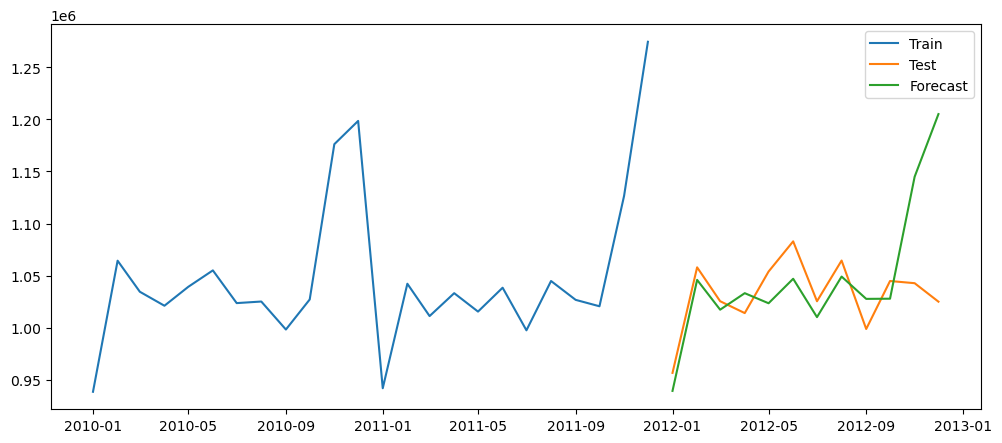

,MAE,MSE,RMSE,MAPE
"TES(alpha=0.1,beta=0.15,gamma=0.75)",40100.476661,3.954728e+09,62886.630884,0.03883


In [174]:
plot_res(train,test,fcast_tes)
tes_m_res = eval_model(test,fcast_tes,'TES(alpha=0.1,beta=0.15,gamma=0.75)')
tes_m_res

###  Arima model

In [175]:
from statsmodels.tsa.stattools import adfuller

In [176]:
def adf_test(data):
    res = adfuller(data)
    print('Test_Stat',res[0])
    print('p-val',res[1])
    if res[1]>0.05:
        print('Ho accepeted - data is not stationary')
    else:
        print('H1 accepeted - data is stationary')
        

In [177]:
adf_test(df1)

Test_Stat -6.061039487243927
p-val 1.212439895949573e-07
H1 accepeted - data is stationary


In [178]:
# inference d= 0

In [179]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

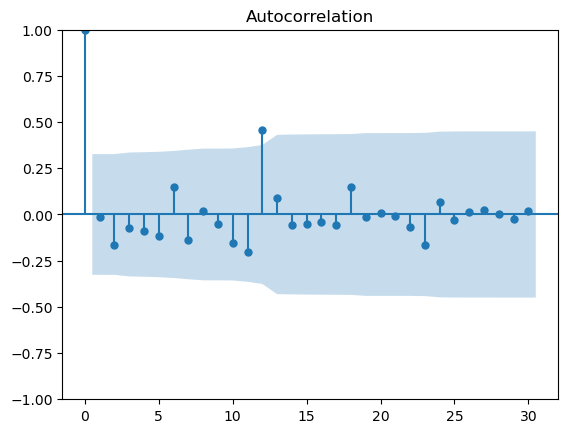

In [180]:
plot_acf(df1,lags=30)
plt.title('Autocorrelation')
plt.show()

In [181]:
# Infrence q=12

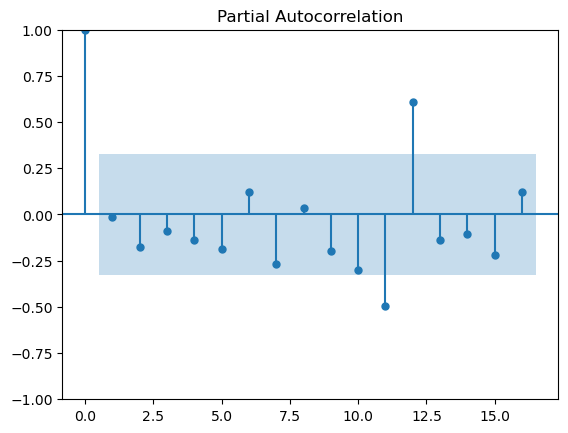

In [182]:
plot_pacf(df1)
plt.title('Partial Autocorrelation')
plt.show()

In [183]:
# Inference p =11,12

In [184]:
from statsmodels.tsa.arima.model import ARIMA

In [185]:
def arima_fun(p,d,q,model_name):
    model = ARIMA(train,order=(p,d,q))
    arima_fit = model.fit()
    fcast = arima_fit.forecast(len(test))
    print(fcast)
    plot_res(train,test,fcast)
    model_res = eval_model(test,fcast,model_name)
    return model_res,fcast

In [186]:
p = list(range(10,15))
d = [0]
q = list(range(10,15))
print(len(p)*len(q)*len(d))

25


In [187]:
min_mse = 9999999999
min_rmse = 99999999999
av = bv = gv =0
c = 0
for i in p:
    for j in d:
        for k in q:
            model = ARIMA(train,order=(i,j,k))
            arima_fit = model.fit()
            fcast = arima_fit.forecast(len(test))
            mse = mean_squared_error(test,fcast)
            rmse = np.sqrt(mse)
            c+=1
            print(f'For Iteration {c},p={i},d={j},q={k},mse={mse},rmse={rmse}')
            if mse <= min_mse:
                min_mse = mse
                pv = i
                dv = j
                qv = k

For Iteration 1,p=10,d=0,q=10,mse=4048276930.270763,rmse=63626.071152246725
For Iteration 2,p=10,d=0,q=11,mse=4118969767.591738,rmse=64179.20042811174
For Iteration 3,p=10,d=0,q=12,mse=4031382253.579254,rmse=63493.16698337904
For Iteration 4,p=10,d=0,q=13,mse=3994314546.0535264,rmse=63200.589760329975
For Iteration 5,p=10,d=0,q=14,mse=4021316782.4715652,rmse=63413.85323784989
For Iteration 6,p=11,d=0,q=10,mse=3721405030.2615876,rmse=61003.31982983867
For Iteration 7,p=11,d=0,q=11,mse=3832519681.95281,rmse=61907.3475603083
For Iteration 8,p=11,d=0,q=12,mse=3859178735.286343,rmse=62122.28855480409
For Iteration 9,p=11,d=0,q=13,mse=3893940852.046562,rmse=62401.44911816201
For Iteration 10,p=11,d=0,q=14,mse=3930758826.491875,rmse=62695.76402351179
For Iteration 11,p=12,d=0,q=10,mse=3737218595.2414494,rmse=61132.794760598415
For Iteration 12,p=12,d=0,q=11,mse=3823705601.5252547,rmse=61836.118907360724
For Iteration 13,p=12,d=0,q=12,mse=3872630783.5677814,rmse=62230.465075939945
For Iteratio

2012-01-01    1.029920e+06
2012-02-01    1.001811e+06
2012-03-01    9.963413e+05
2012-04-01    1.026125e+06
2012-05-01    1.026912e+06
2012-06-01    1.050822e+06
2012-07-01    1.000994e+06
2012-08-01    1.040230e+06
2012-09-01    1.058160e+06
2012-10-01    1.021252e+06
2012-11-01    1.041751e+06
2012-12-01    1.197657e+06
Freq: MS, Name: predicted_mean, dtype: float64


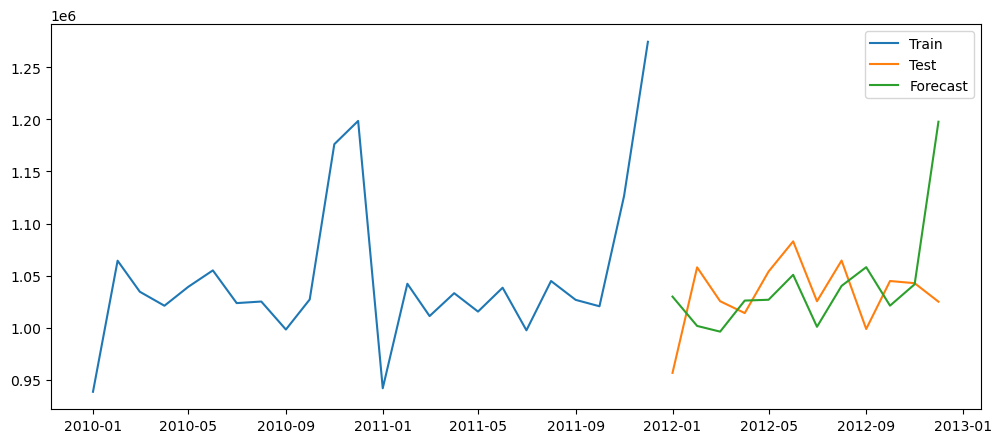

,MAE,MSE,RMSE,MAPE
"ARIMA(p=11,d=0,q=12)",44579.022353,3.859179e+09,62122.288555,0.043595


In [188]:
ar1_res,ar1_fcast = arima_fun(11,0,12,'ARIMA(p=11,d=0,q=12)')
ar1_res

2012-01-01    1.029928e+06
2012-02-01    1.002240e+06
2012-03-01    9.971493e+05
2012-04-01    1.026385e+06
2012-05-01    1.026872e+06
2012-06-01    1.050484e+06
2012-07-01    1.000536e+06
2012-08-01    1.039639e+06
2012-09-01    1.057561e+06
2012-10-01    1.020917e+06
2012-11-01    1.042175e+06
2012-12-01    1.198317e+06
Freq: MS, Name: predicted_mean, dtype: float64


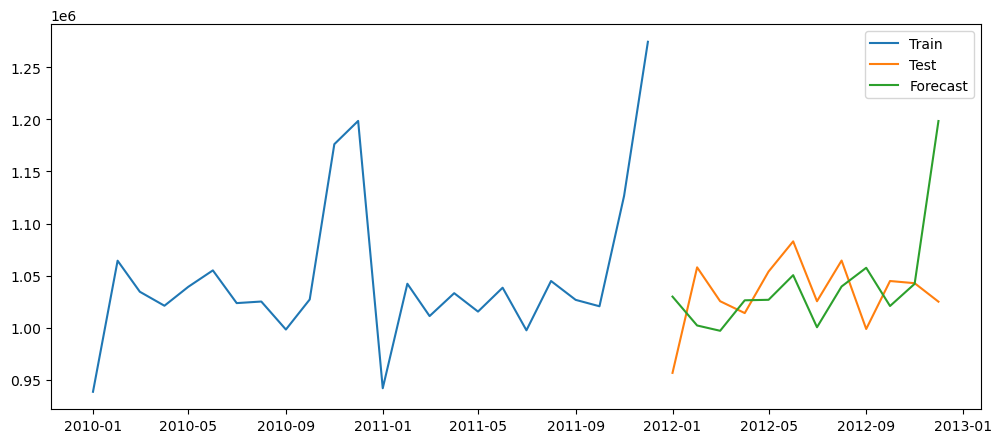

,MAE,MSE,RMSE,MAPE
"ARIMA(p=12,d=0,q=12)",44614.769069,3.872631e+09,62230.465076,0.043627


In [189]:
ar1_res,ar1_fcast = arima_fun(12,0,12,'ARIMA(p=12,d=0,q=12)')
ar1_res

In [190]:
print('min_mse',min_mse)
print('best_pv',pv)
print('best_dv',dv)
print('best_qv',qv)

min_mse 3714710706.72134
best_pv 14
best_dv 0
best_qv 10


2012-01-01    1.031621e+06
2012-02-01    1.002655e+06
2012-03-01    9.960412e+05
2012-04-01    1.025606e+06
2012-05-01    1.026755e+06
2012-06-01    1.051230e+06
2012-07-01    1.001801e+06
2012-08-01    1.040370e+06
2012-09-01    1.057444e+06
2012-10-01    1.021340e+06
2012-11-01    1.041891e+06
2012-12-01    1.192526e+06
Freq: MS, Name: predicted_mean, dtype: float64


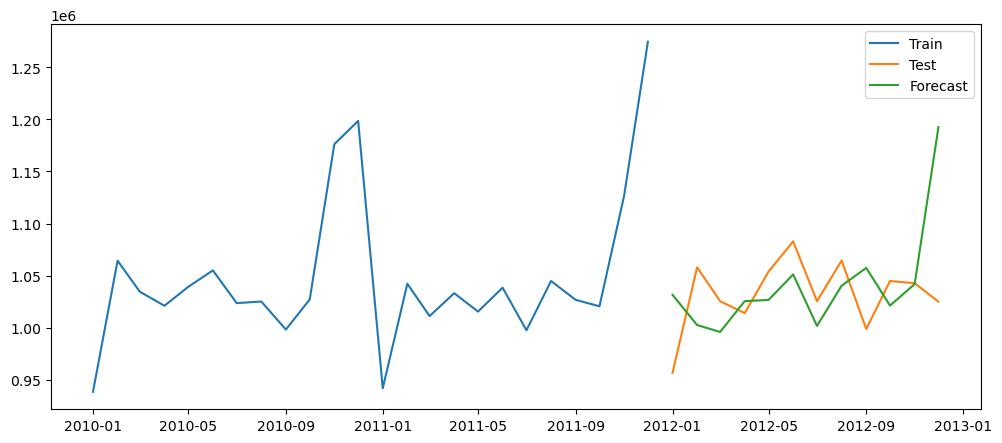

,MAE,MSE,RMSE,MAPE
"ARIMA(p=11,d=0,q=12)",44026.069839,3.714711e+09,60948.426614,0.043068


In [191]:
ar1_res,ar1_fcast = arima_fun(14,0,10,'ARIMA(p=11,d=0,q=12)')
ar1_res

In [197]:
train.head()

,Weekly_Sales
Date,
2010-01-01,9.386639e+05
2010-02-01,1.064372e+06
2010-03-01,1.034590e+06
2010-04-01,1.021177e+06
2010-05-01,1.039303e+06


In [198]:
model_final = ARIMA(df1,order=(12,0,12))
arima_final = model_final.fit()

#### Forecasting of avg sales for next  12 months

In [200]:
fcast = arima_final.forecast(12)
fcast

2013-01-01    9.706878e+05
2013-02-01    1.099226e+06
2013-03-01    1.003217e+06
2013-04-01    1.008351e+06
2013-05-01    1.082503e+06
2013-06-01    1.086392e+06
2013-07-01    1.037477e+06
2013-08-01    1.065159e+06
2013-09-01    1.037473e+06
2013-10-01    1.041371e+06
2013-11-01    1.039955e+06
2013-12-01    1.040700e+06
Freq: MS, Name: predicted_mean, dtype: float64